<a href="https://colab.research.google.com/github/Ashwin1234/CS-533-Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.utils import tokenize
from gensim.models import Word2Vec

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
sarc = pd.read_csv('/content/drive/MyDrive/archive/train-balanced-sarc.csv',on_bad_lines='skip')
sarcasm = pd.read_csv('/content/drive/MyDrive/archive/train-balanced-sarcasm.csv',on_bad_lines='skip')

In [3]:
sarcasm.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
sarcasm.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [5]:
sarcasm.dtypes

label              int64
comment           object
author            object
subreddit         object
score              int64
ups                int64
downs              int64
date              object
created_utc       object
parent_comment    object
dtype: object

In [6]:
sarc.describe()

,0\tNC and NH.\tTrumpbart\tpolitics\t2\t-1\t-1\t2016-10\t1476662123\tYeah,I get that argument. At this point,I'd prefer is she lived in NC as well.
count,875013,418398,130592
unique,792326,404044,126287
top,1\tYeah,right?,right?
freq,10273,500,377


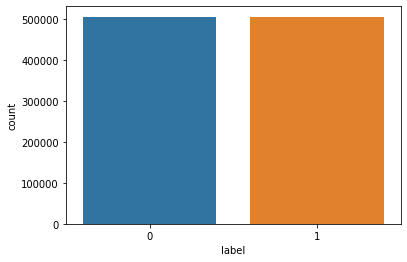

In [7]:
sns.countplot(x='label',data = sarcasm)

In [ ]:

sns.countplot(x='subreddit',data = sarcasm[sarcasm['label'] == 0])

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


In [8]:
sarcasm = sarcasm.drop(['author','date','created_utc'],axis = 1)

In [9]:
sarcasm = sarcasm.dropna(subset = ['comment'])
sarcasm['comment'] = sarcasm.apply(lambda row:list(tokenize(row['comment'])),axis = 1)

In [12]:
sarcasm['comment']

0                                              [NC, and, NH]
1          [You, do, know, west, teams, play, against, we...
2          [They, were, underdogs, earlier, today, but, s...
3          [This, meme, isn, t, funny, none, of, the, new...
4                     [I, could, use, one, of, those, tools]
                                 ...                        
1010821    [I, m, sure, that, Iran, and, N, Korea, have, ...
1010822             [whatever, you, do, don, t, vote, green]
1010823    [Perhaps, this, is, an, atheist, conspiracy, t...
1010824    [The, Slavs, got, their, own, country, it, is,...
1010825    [values, as, in, capitalism, there, is, good, ...
Name: comment, Length: 1010773, dtype: object

In [26]:
sarcasm['comment'] = sarcasm.apply(lambda row: Word2Vec([row],size = 50,workers = 3,window = 3, sg = 1), axis = 1)

TypeError: ignored

In [20]:
[sarcasm['comment'][0]]

[['NC', 'and', 'NH']]